# Visualizing Earnings Based on College Majors

American Community Survey ACS https://www.census.gov/programs-surveys/acs/ is a demographic survey organization run by the U.S. Census Bureau to better understand communities. Information from their surveys generate data that help determine how money is spent by federal and state governments. Their surveys are excellent sources for local business, hospitals, schools, and community leaders planning and making decisions.  Examples of some of their survey topics include jobs, occupations, educational attainment, veterans, and housing, just to name a few. The survey for this project; 'Visualizing Earnings Based on College Majors,'comes from a survey ACS conducted and aggregated on job outcomes of college students between 2010 and 2012. 

## Majors, Income, Employment and Gender Correlations 
This project is for the completion of the DataQuest.io https://www.dataquest.io/ "Exploratory Data Visualization" module; the fourth in a series for the completing Data Science course path. For this assignment, questions will be answered using the material focused on up to this point in the course, with particular consideration for the new material introduced in this module. This material includes:

- Using the Pandas library to quickly generate common plots from data.
- Understanding the underlying functionality of the Matplotlib library.
- Plot customization using Figure, Axes, and other objects.

### Popular Majors as a Whole
The analysis was broken into two parts. The first part focused on salary and unemployment rate of the most popular majors. (The sample size is related to the total size, which defines the 'popularity' of a college major in the context of this learning project). The following questions were addressed: 
- What are the most popular majors?
- Do students graduating with these degrees make more money? 
- What is the unemployment rate for these majors? 

### Popular Majors with Men and Women
The second part focused on female dominated majors vs. male dominated majors and the following questions were addressed? 
- What majors have the largest share of women? What majors have the largest share of men? 
- What is the median salary for these majors? 
- What is the unemployment rate for these majors? 

## Summary of Results
Nursing is a very popular and a good choice for all students to consider. The salary is well above average and the unemployment rate is well below average. Psychology is not a good choice for either men or women. Although it's one of the most popular, it has a lower than average salary and a higher than average unemployment rate. 
Both male and female students would do well pursuing certain degrees that are dominated by the opposite sex. Medical assisting services, which consisted of 92% women, pays above average and has a lower than average unemployment rate. Mechanical engineering, which is 92% men has a higher than average salary and a lower than average unemployment rate as well. 

See the analysis for further details. 

# Data Source and Exploration

This dataset, originally released by American Community Survey 2010-2012 Public Use Microdata Series: https://www.census.gov/programs-surveys/acs/, was conducted and aggregated on job outcomes of college students between 2010 and 2012. FiveThirtyEight cleaned and released the dataset on their Github repo https://github.com/fivethirtyeight/data/tree/master/college-majors. According to FiveThiryEight, Major categories are from Carnevale et al, "What's It Worth?: The Economic Value of College Majors." Georgetown University Center on Education and the Workforce, 2011. http://cew.georgetown.edu/whatsitworth. 

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:


|Column Name|Details|
| :-------: | :---: |
|Rank|Rank by median earnings (the dataset is ordered by this column)|
|Major_code|Major code|
|Major |Major description|
|Major_category|Category of major|
|Total|Total number of people with major|
|Sample_size|Sample size (unweighted) of full-time grads with regards to major|
|Men |Male graduates|
|Women|Female graduates|
|ShareWomen|Women as share of total|
|Employed|Number employed|
|Median|Median salary of full-time, year-round workers|
|Low_wage_jobs|Number in low-wage service jobs|
|Full_time|Number employed 35 hours or more|
|Part_time|Number employed less than 35 hours|

In [710]:
# Import the relavant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [711]:
# First 5 rows of data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [712]:
# Summary statistics of each column
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [713]:
# Finding the null values
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

## Data Cleaning and Wrangling
Matplotlib requires columns and values passed in to have matching lengths; otherwise, errors will be raised. From the initial exploration, there appeared to be single row missing several values. This was confirmed by finding the row and column count before and after applying the Dataframe.dropna() method. The initial row, column matrix was 173 x 21. After removing the row, the matrix was 172 x 21. 

In [714]:
s = recent_grads.shape
print ('The starting data set contains {} rows and {} columns.'.format(s[0], s[1]))

The starting data set contains 173 rows and 21 columns.


In [715]:
# Drop missing values
recent_grads = recent_grads.dropna()

In [716]:
c = recent_grads.shape
print ('The cleaned data set contains {} rows and {} columns.'.format(c[0], c[1]))

The cleaned data set contains 172 rows and 21 columns.


In [717]:
# Find total number of samples
sample_total = recent_grads['Sample_size'].sum()
print('There are {} samples all total'.format(sample_total))

There are 61566 samples all total


## Relationship Between Major Popularity and Salary
The median salary for the entire sample population was \\$36,000. The 'Median Salary vs. Sample Size' plot below showed that, the students graduating with the more popular majors made close to the median salary.   

The top 5 majors in order of popularity (based on sample size) were Business Management and Administration, Marketing and Marketing Research, Psychology, Nursing and Communications. Nursing, which was the 4th most popular, was well above the median at \\$48,000. Psychology, the 3rd most popular, was below the median at \\$31,000. Business and Marketing were slightly above at \\$38,000, followed by Communications which was slightly below at \\$35,000. 

In [718]:
# Find Median and Standard Dev of Salaries
median_median_salary = recent_grads['Median'].median()
print('The median salary of recent grads is ${:.2f}'.format(median_median_salary))
median_stdv = recent_grads['Median'].std()
print('The standard deviation is ${:.2f}'.format(median_stdv))

The median salary of recent grads is $36000.00
The standard deviation is $11461.39


In [719]:
# Put Top 5 most popular majors, sample size and median salary in a table
mostpop_5 = recent_grads[['Major', 'Sample_size', 'Median']].sort_values(by= 'Sample_size', ascending = False).iloc[:5]
mostpop_5_table = mostpop_5.copy()
mostpop_5_table = mostpop_5_table.rename(columns = {"Median":"Median_Salary ($)"})
mostpop_5_table.sort_values('Median_Salary ($)', ascending = False, inplace = True)
mostpop_5_table.index.rename('Salary_Rank', inplace = True)
mostpop_5_table

,Major,Sample_size,Median_Salary ($)
Salary_Rank,,,
34,NURSING,2554,48000
76,BUSINESS MANAGEMENT AND ADMINISTRATION,4212,38000
77,MARKETING AND MARKETING RESEARCH,2684,38000
93,COMMUNICATIONS,2394,35000
145,PSYCHOLOGY,2584,31500


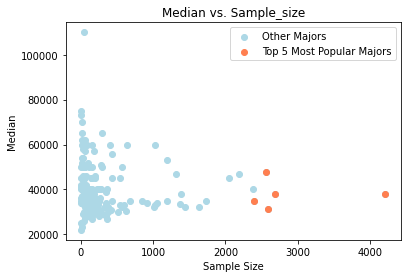

In [720]:
# Create scatter plot of "Median vs. Sample Size"
ax = plt.scatter(x = recent_grads['Sample_size'], y = recent_grads['Median'], 
                 c = 'lightblue', label = 'Other Majors')
ax = plt.scatter(x = mostpop_5['Sample_size'], y = mostpop_5['Median'], 
                 c = 'coral', label = 'Top 5 Most Popular Majors')
plt.title('Median vs. Sample_size')
plt.xlabel('Sample Size')
plt.ylabel('Median')
plt.legend()

## Unemployment Rate of the Most Popular Majors

The median unemployment rate for all students in this survey from 2010 to 2012 was 6.75%.  'Unemployment Rate vs. the Sample Size' plot below shows that, in general, Nursing had the lowest at 4.49%, Marketing was second at 6.12%, Business and Communications were above the average at 7.22% and 7.52% respectively. At 8.38% Psychology had the highest unemployment rate of all five.  

In [721]:
# Put Top 5 most popular majors, sample size and unemployment rate in table
mostpop_5_U = recent_grads[['Major', 'Sample_size', 'Unemployment_rate']].sort_values(by= 'Sample_size', ascending = False).iloc[:5]
mostpop_5_U_table = mostpop_5_U.copy()
mostpop_5_U_table['Unemployment_rate'] = mostpop_5_U['Unemployment_rate'].apply(lambda x: round((x*100),2))
mostpop_5_U_table.sort_values('Unemployment_rate', inplace = True)
mostpop_5_U_table.rename(columns = {'Unemployment_rate':"Unemployment_rate_(%)"}, inplace = True)
mostpop_5_U_table.index.rename('Salary_Rank', inplace = True)
mostpop_5_U_table

,Major,Sample_size,Unemployment_rate_(%)
Salary_Rank,,,
34,NURSING,2554,4.49
77,MARKETING AND MARKETING RESEARCH,2684,6.12
76,BUSINESS MANAGEMENT AND ADMINISTRATION,4212,7.22
93,COMMUNICATIONS,2394,7.52
145,PSYCHOLOGY,2584,8.38


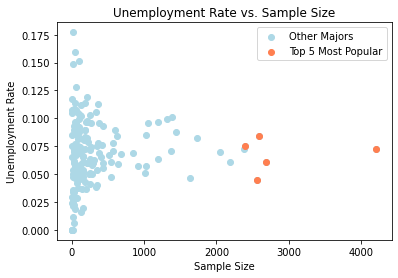

In [722]:
# Determine unemployment rate and the sample size
ax = plt.scatter(x = recent_grads['Sample_size'],y = recent_grads['Unemployment_rate'], 
                 c = 'lightblue', label = 'Other Majors')
ax = plt.scatter(x = mostpop_5_U['Sample_size'], y = mostpop_5_U['Unemployment_rate'], 
                 c = 'coral', label = 'Top 5 Most Popular')
plt.title('Unemployment Rate vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Unemployment Rate')
plt.legend()

## Majority Male/Female Majors and Salary
 
The average median salary for students graduating from female majority disciplines was \\$33,961.The top five majors with the highest percentage of women were Early Childhood Education, Communication Disorders Sciences and Services, Medical Assisting Services, Elementary Education, and Family and Consumer Science. Even though four of five of these degrees had a lower salaries, the unemployment rate for all five was lower than the population. Medical Assisting Services, which consisted of 92% women, stood out with the highest salary of \\$42,000, and the second lowest unemployment rate of 4.24% Only Early Childhood Education had a lower unemployment rate of 4.01%; however, with a salary of only \\$28,000 it was the lowest paying.

The average median salary for students graduating from male majority disciplines was \\$34,272. The top five majors with the highest percentage of men were Military Technologies, Mechanical Engineering and Related Technologies, Construction Services, Mining and Mineral Engineering, and Naval Architecture and Marine Engineering. Although Military Technologies was 100% men and an unemployment rate of 0%, the sample size was only 4. As a matter-of-fact, the sample sizes for the three of the five, primarily male dominated degrees were too small to draw any conclusion. Only Mechanical Engineering and Construction Services had high enough sample sizes to draw any reasonable conclusions. Both had over 90% men, and both paid at least 10% more than the median. They both had unemployment rates exceeding 5.6%, which was better than the median, but not as good as the female dominated majors.   

In [723]:
above50_women = recent_grads[['ShareWomen', 'Major','Median']].sort_values(by = 'ShareWomen', ascending = False).iloc[:85]
above50_women_mean = above50_women['Median'].mean()
print('The average median salary for students graduating                              from majors that are > 50% female is ${:.0f}.'.format(above50_women_mean))

The average median salary for students graduating                              from majors that are > 50% female is $33961.


In [724]:
below50_women = recent_grads[['ShareWomen', 'Major','Median']].sort_values(by = 'ShareWomen').iloc[85:172]
below50_women_mean = below50_women['Median'].mean()
print('The average median salary for students graduating                                      from majors that are > 50% male is ${:.0f}.'.format(below50_women_mean))

The average median salary for students graduating                                      from majors that are > 50% male is $34272.


In [725]:
# Find the degrees with the highest share of women. 
top_5_women = recent_grads[['Sample_size','ShareWomen', 'Major','Median', 'Unemployment_rate']].sort_values(by = 'ShareWomen', ascending = False).iloc[:5]
top_5_women_table = top_5_women.copy()
top_5_women_table = top_5_women_table.rename(columns = {'ShareWomen':'Percent_Women',"Median":"Median_Salary ($)"})
top_5_women_table['Percent_Women'] = top_5_women_table['Percent_Women'].apply(lambda x: round((x*100),2))
top_5_women_table['Unemployment_rate'] = top_5_women_table['Unemployment_rate'].apply(lambda x: round((x*100),2))
top_5_women_table.rename(columns = {'Unemployment_rate':"Unemployment_rate_(%)"}, inplace = True)
top_5_women_table.set_index('Major', inplace = True)
top_5_women_table

,Sample_size,Percent_Women,Median_Salary ($),Unemployment_rate_(%)
Major,,,,
EARLY CHILDHOOD EDUCATION,342,96.90,28000,4.01
COMMUNICATION DISORDERS SCIENCES AND SERVICES,95,96.80,28000,4.76
MEDICAL ASSISTING SERVICES,67,92.78,42000,4.25
ELEMENTARY EDUCATION,1629,92.37,32000,4.66
FAMILY AND CONSUMER SCIENCES,518,91.09,30000,6.71


In [726]:
# Find the degrees with the highest share of men. 
bottom_5_share_w = recent_grads[['Sample_size','ShareWomen', 'Major','Median', 'Unemployment_rate']].sort_values(by = 'ShareWomen', ascending = True).iloc[:5]
bottom_5_share_w_table = bottom_5_share_w.copy()
bottom_5_share_w_table = bottom_5_share_w_table.rename(columns = {'ShareWomen':'Percent_Men',"Median":"Median_Salary ($)"})
bottom_5_share_w_table['Percent_Men'] = bottom_5_share_w_table['Percent_Men'].apply(lambda x: round((100-x*100),2))
bottom_5_share_w_table['Unemployment_rate'] = bottom_5_share_w_table['Unemployment_rate'].apply(lambda x: round((x*100),2))
bottom_5_share_w_table.rename(columns = {'Unemployment_rate':"Unemployment_rate_(%)"}, inplace = True)
bottom_5_share_w_table.set_index('Major', inplace = True)
bottom_5_share_w_table

,Sample_size,Percent_Men,Median_Salary ($),Unemployment_rate_(%)
Major,,,,
MILITARY TECHNOLOGIES,4,100.00,40000,0.00
MECHANICAL ENGINEERING RELATED TECHNOLOGIES,71,92.25,40000,5.64
CONSTRUCTION SERVICES,295,90.93,50000,6.00
MINING AND MINERAL ENGINEERING,7,89.81,75000,11.72
NAVAL ARCHITECTURE AND MARINE ENGINEERING,16,89.27,70000,5.01


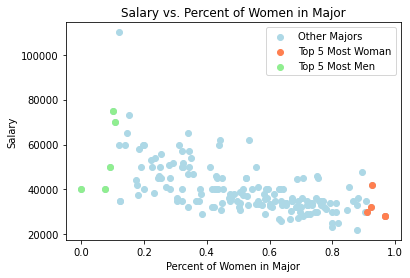

In [727]:

ax = plt.scatter(x = recent_grads['ShareWomen'],y = recent_grads['Median'], 
                 c = 'lightblue', label = 'Other Majors')
ax = plt.scatter(x = top_5_women['ShareWomen'], y = top_5_women['Median'], 
                 c = 'coral', label = 'Top 5 Most Woman')
ax = plt.scatter(x = bottom_5_share_w['ShareWomen'], y = bottom_5_share_w['Median'], 
                 c = 'lightgreen', label = 'Top 5 Most Men')

plt.title('Salary vs. Percent of Women in Major')
plt.xlabel('Percent of Women in Major')
plt.ylabel('Salary')
plt.legend()

## Conclusion
The data set contained 173 rows and 21 columns. Only one row was removed for having null values. Each row contained a number of samples per major totaling 
61,566.

### Popular Majors as a Whole
Business Management and Administration, Marketing and Marketing Research, Psychology, Nursing, and Communications were the top 5 most popular majors. Of those, Nursing, paid the best at \\$48,000, well above the \\$36,000 median salary for the entire population. By contrast, Psychology, the 3rd most popular, paid the worst at \\$31,000. Regarding unemployment, Nursing students fared the best with an unemployment rate of only 4.5\%, which was below the median of 6.75%. By contrast, the unemployment rate for Psychology majors was 8.38\%. 

Nursing is a very good choice for all students to consider. The salary is well above average and the unemployment rate is well below average. Psychology is not a good choice. Although it's one of the most popular, it has a lower than average salary and a higher than average unemployment rate.

### Popular Majors with Men and Women
The average median salary for students graduating from female majority disciplines was \\$33,961. Medical Assisting Services, which consisted of 92% women, stood out with the highest salary of \\$42,000, and the second lowest unemployment rate of 4.24%. Early Childhood Education paid the lowest at $28,000, but only had a 4.01% unemployment rate.

The average median salary for students graduating from male majority disciplines was \\$34,272. Only Mechanical Engineering and Construction Services had high enough sample sizes to draw any reasonable conclusions from. Both had over 90% men, and both paid at least 10% more than the median. However; they both had unemployment rates exceeding 5.6%.

Both Male and female students would do well pursuing certain degrees that are dominated by the opposite gender. Medical Assisting Services, which consisted of 92% women, pays above average and has a lower than average unemployment rate. Mechanical Engineering, which is 92% men has a higher than average salary and a lower than average unemployment rate as well.